<a href="https://colab.research.google.com/github/amscala/AHI_Program/blob/main/Data_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving National_Vital_Statistics_System__NVSS__-_National_Cardiovascular_Disease_Surveillance_Data.csv to National_Vital_Statistics_System__NVSS__-_National_Cardiovascular_Disease_Surveillance_Data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['National_Vital_Statistics_System__NVSS__-_National_Cardiovascular_Disease_Surveillance_Data.csv']))

# Data Overview

In [ ]:
df.head (5)

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2000,MT,Montana,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,Age-Standardized,"Rate per 100,000",362.3,362.3,NaN,NaN,358.6,444.8,Race,Other,C1,T1,NV001,AgeStdz,BOC04,RAC07,30,POINT (-109.42442064499971 47.06652897200047)
1,2000,VT,Vermont,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,Crude,"Rate per 100,000",3637.0,3637.0,NaN,NaN,3636.9,3637.1,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,50,POINT (-72.51764079099962 43.62538123900049)
2,2002,OH,Ohio,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,Crude,"Rate per 100,000",28.0,28.0,NaN,NaN,27.9,28.1,Age,25-44,C1,T1,NV001,Crude,BOC03,AGE04,39,POINT (-82.40426005599966 40.06021014100048)
3,2003,DE,Delaware,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,Crude,"Rate per 100,000",3556.0,3556.0,NaN,NaN,3556.0,3556.0,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,10,POINT (-75.57774116799965 39.008830667000495)
4,2003,VT,Vermont,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,Crude,"Rate per 100,000",3240.0,3240.0,NaN,NaN,3239.9,3240.1,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,50,POINT (-72.51764079099962 43.62538123900049)


In [ ]:
df.shape

(158080, 29)

In [ ]:
df.dtypes

Year                            int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
PriorityArea1                  object
PriorityArea2                  object
PriorityArea3                  object
PriorityArea4                  object
Category                       object
Topic                          object
Indicator                      object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
LowConfidenceLimit            float64
HighConfidenceLimit           float64
Break_Out_Category             object
Break_Out                      object
CategoryId                     object
TopicId                        object
IndicatorID                    object
Data_Value_TypeID              object
BreakOutCategoryId             object
BreakOutId  

# Value Counts

In [ ]:
print("Year")
print(df['Year'].value_counts())
print()

print("LocationDesc")
print(df['LocationDesc'].value_counts())
print()

print("Data_Value_Type")
print(df['Data_Value_Type'].value_counts())
print()

Year
2018    8320
2008    8320
2001    8320
2002    8320
2003    8320
2004    8320
2005    8320
2006    8320
2007    8320
2009    8320
2017    8320
2010    8320
2011    8320
2012    8320
2013    8320
2014    8320
2015    8320
2016    8320
2000    8320
Name: Year, dtype: int64

LocationDesc
Maryland          3040
Virginia          3040
New Hampshire     3040
Mississippi       3040
Arizona           3040
Florida           3040
South Carolina    3040
Arkansas          3040
Delaware          3040
Oregon            3040
Kansas            3040
Alabama           3040
Nevada            3040
Missouri          3040
Pennsylvania      3040
Louisiana         3040
Oklahoma          3040
California        3040
Georgia           3040
New Jersey        3040
Montana           3040
Tennessee         3040
Iowa              3040
Rhode Island      3040
Wisconsin         3040
North Carolina    3040
Kentucky          3040
Ohio              3040
South Dakota      3040
Idaho             3040
Alaska            3

# Central Tendency/Distribution

In [ ]:
df.describe()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,158080.000000,129093.000000,158080.000000,129093.000000,129093.000000,158080.000000
mean,2009.000000,196.724188,160.284297,196.550075,199.224551,29.538462
std,5.477243,393.849595,364.125272,393.856019,394.213148,16.064179
min,2000.000000,0.100000,-2.000000,0.100000,0.100000,1.000000
25%,2004.000000,26.300000,11.800000,26.100000,28.300000,16.750000
50%,2009.000000,66.700000,45.000000,66.500000,69.300000,29.500000
75%,2014.000000,225.800000,174.400000,225.600000,229.200000,42.500000
max,2018.000000,4789.400000,4789.400000,4737.400000,5937.200000,59.000000


In [ ]:
df2 = df[['Data_Value', 'Data_Value_Alt','LowConfidenceLimit','HighConfidenceLimit']]
df2.mode(axis=0, numeric_only=True, dropna=True)

,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit
0,14.1,-2.0,15.4,15.6


In [ ]:
df.quantile(.5)

Year                   2009.0
Data_Value               66.7
Data_Value_Alt           45.0
LowConfidenceLimit       66.5
HighConfidenceLimit      69.3
LocationID               29.5
Name: 0.5, dtype: float64

# Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f743268b828>,
      dtype=object)

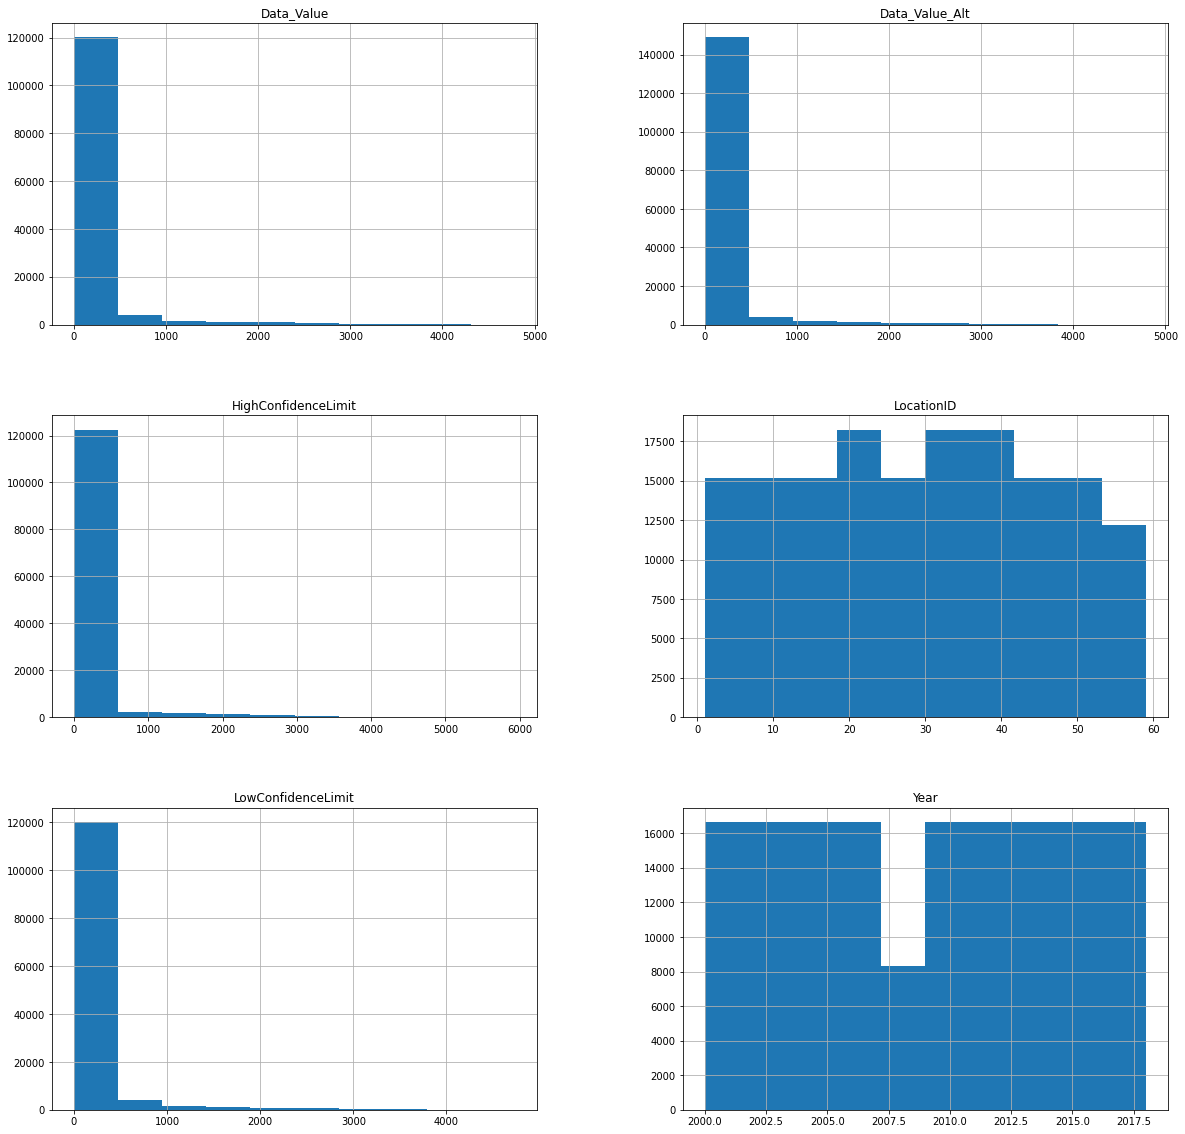

In [ ]:
df.hist(figsize=(20,20))

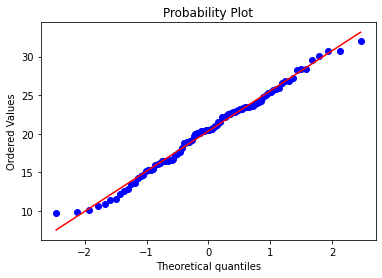

In [ ]:
measurements=np.random.normal(loc=20,scale=5,size=100)
stats.probplot(measurements,dist='norm',plot=pylab)
pylab.show()

(array([ 9120.,  9120., 12160.,  9120., 12160., 12160., 12160.,  9120.,
        12160., 12160.,  9120., 12160., 12160.,  9120.,  6080.]),
 array([ 1.        ,  4.86666667,  8.73333333, 12.6       , 16.46666667,
        20.33333333, 24.2       , 28.06666667, 31.93333333, 35.8       ,
        39.66666667, 43.53333333, 47.4       , 51.26666667, 55.13333333,
        59.        ]),
 <a list of 15 Patch objects>)

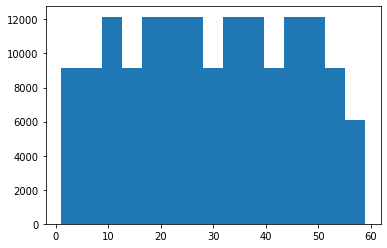

In [ ]:
plt.hist(df["LocationID"],bins=15)

# Missing Data

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum().sum()

348187

In [ ]:
df.isnull().sum()

Year                               0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
PriorityArea1                      0
PriorityArea2                      0
PriorityArea3                      0
PriorityArea4                      0
Category                           0
Topic                              0
Indicator                          0
Data_Value_Type                    0
Data_Value_Unit                    0
Data_Value                     28987
Data_Value_Alt                     0
Data_Value_Footnote_Symbol    129093
Data_Value_Footnote           129093
LowConfidenceLimit             28987
HighConfidenceLimit            28987
Break_Out_Category                 0
Break_Out                          0
CategoryId                         0
TopicId                            0
IndicatorID                        0
Data_Value_TypeID                  0
BreakOutCategoryId                 0
BreakOutId                         0
L

# Transformations

In [ ]:
df.groupby("Data_Value_Alt")["Data_Value"].transform('mean')

0          362.3
1         3637.0
2           28.0
3         3556.0
4         3240.0
           ...  
158075       NaN
158076       9.1
158077      11.0
158078       9.9
158079       NaN
Name: Data_Value, Length: 158080, dtype: float64

In [ ]:
df.groupby("LowConfidenceLimit")["HighConfidenceLimit"].transform('mean')

0          365.276923
1         3637.100000
2           30.111017
3         3556.000000
4         3240.100000
             ...     
158075            NaN
158076      11.344643
158077      12.880769
158078      11.888816
158079            NaN
Name: HighConfidenceLimit, Length: 158080, dtype: float64

# Quartile Ranges

In [ ]:
df.quantile(.25)

Year                   2004.00
Data_Value               26.30
Data_Value_Alt           11.80
LowConfidenceLimit       26.10
HighConfidenceLimit      28.30
LocationID               16.75
Name: 0.25, dtype: float64

In [ ]:
df.quantile(.50)

Year                   2009.0
Data_Value               66.7
Data_Value_Alt           45.0
LowConfidenceLimit       66.5
HighConfidenceLimit      69.3
LocationID               29.5
Name: 0.5, dtype: float64

In [ ]:
df.quantile(.75)

Year                   2014.0
Data_Value              225.8
Data_Value_Alt          174.4
LowConfidenceLimit      225.6
HighConfidenceLimit     229.2
LocationID               42.5
Name: 0.75, dtype: float64

In [ ]:
df.quantile([.25,.50,.75],axis=0)

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
0.25,2004.0,26.3,11.8,26.1,28.3,16.75
0.50,2009.0,66.7,45.0,66.5,69.3,29.50
0.75,2014.0,225.8,174.4,225.6,229.2,42.50
